## Google Vision API

In [1]:
!pip install --upgrade google-cloud-vision

### Upload Service Account Key File

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [3]:
import os

# Imports Credential File:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "msds-coursework-dfc6d72abbc5.json"
print("Service Account Key: {}".format(os.environ["GOOGLE_APPLICATION_CREDENTIALS"]))

Service Account Key: msds-coursework-dfc6d72abbc5.json


### Detect landmarks

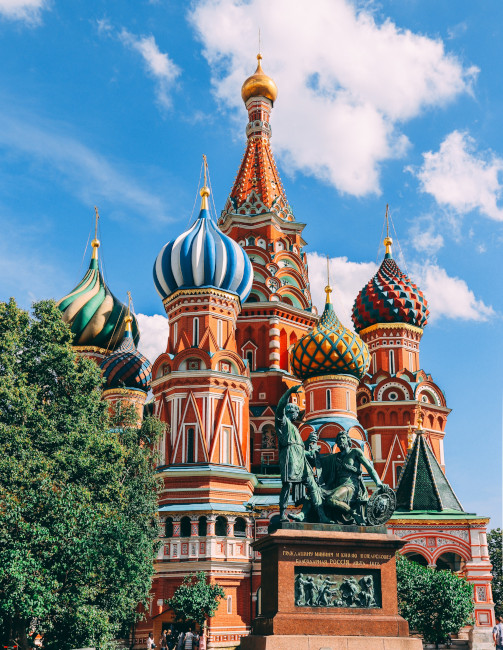

In [22]:
uploaded = files.upload()

Saving saint_basil_cathedral.jpeg to saint_basil_cathedral.jpeg


In [21]:
# Detects landmarks in the file
def detect_landmarks(path):
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print('Landmarks:')

    for landmark in landmarks:
        print(landmark.description)
        for location in landmark.locations:
            lat_lng = location.lat_lng
            print('Latitude {}'.format(lat_lng.latitude))
            print('Longitude {}'.format(lat_lng.longitude))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [24]:
detect_landmarks('saint_basil_cathedral.jpeg')

Landmarks:
Saint Basil's Cathedral
Latitude 55.752912
Longitude 37.622315883636475
St. Basil's Cathedral
Latitude 55.752522899999995
Longitude 37.623086799999996


In [17]:
# Detects landmarks in the file located in Google Cloud Storage or on the Web
def detect_landmarks_uri(uri):
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = uri

    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print('Landmarks:')

    for landmark in landmarks:
        print(landmark.description)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [20]:
detect_landmarks_uri("gs://cloud-samples-data/vision/landmark/st_basils.jpeg")

Landmarks:
Saint Basil's Cathedral
St. Basil's Cathedral


#### Another example with a picture taken by me

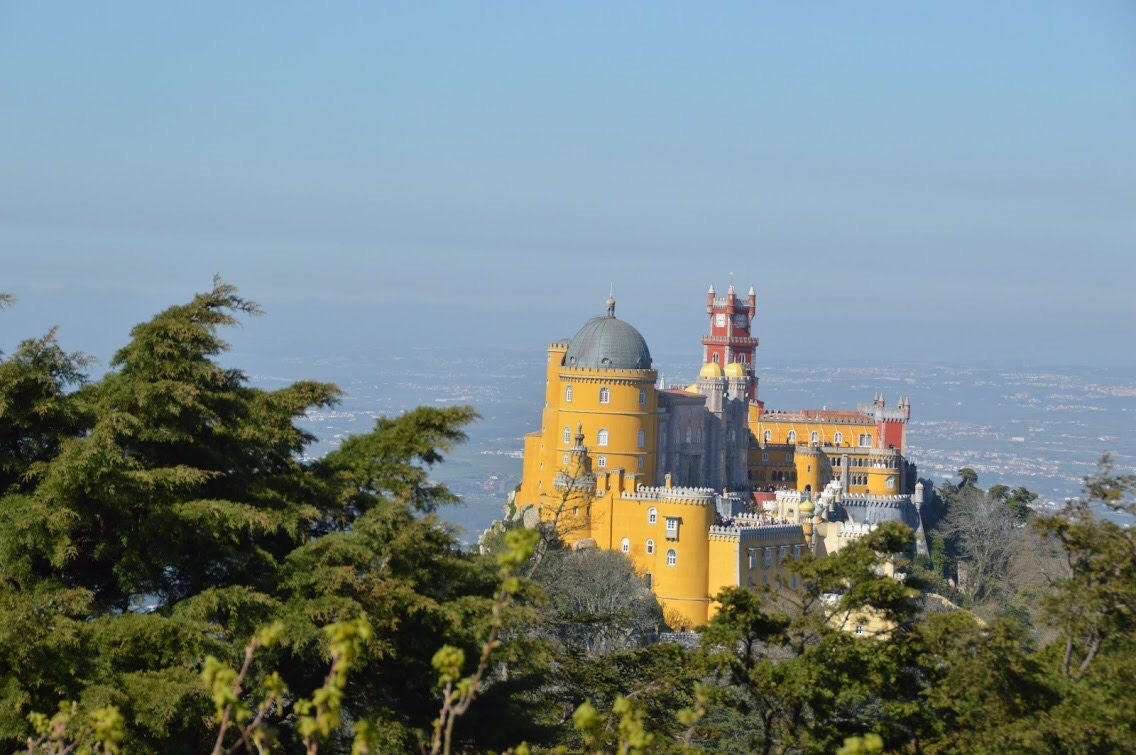

In [31]:
uploaded = files.upload()

Saving pena_castle.jpeg to pena_castle.jpeg


In [32]:
detect_landmarks('pena_castle.jpeg')

Landmarks:
Cruz Alta
Latitude 38.7820548
Longitude -9.3913862
Sintra-Cascais Natural Park
Latitude 38.7936463
Longitude -9.4339344


### Detect multiple objects

In [25]:
def localize_objects(path):

    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with open(path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    objects = client.object_localization(
        image=image).localized_object_annotations

    print('Number of objects found: {}'.format(len(objects)))
    for object_ in objects:
        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        for vertex in object_.bounding_poly.normalized_vertices:
            print(' - ({}, {})'.format(vertex.x, vertex.y))

In [29]:
# using a photo taken by me
uploaded = files.upload()

Saving parfait.jpeg to parfait.jpeg


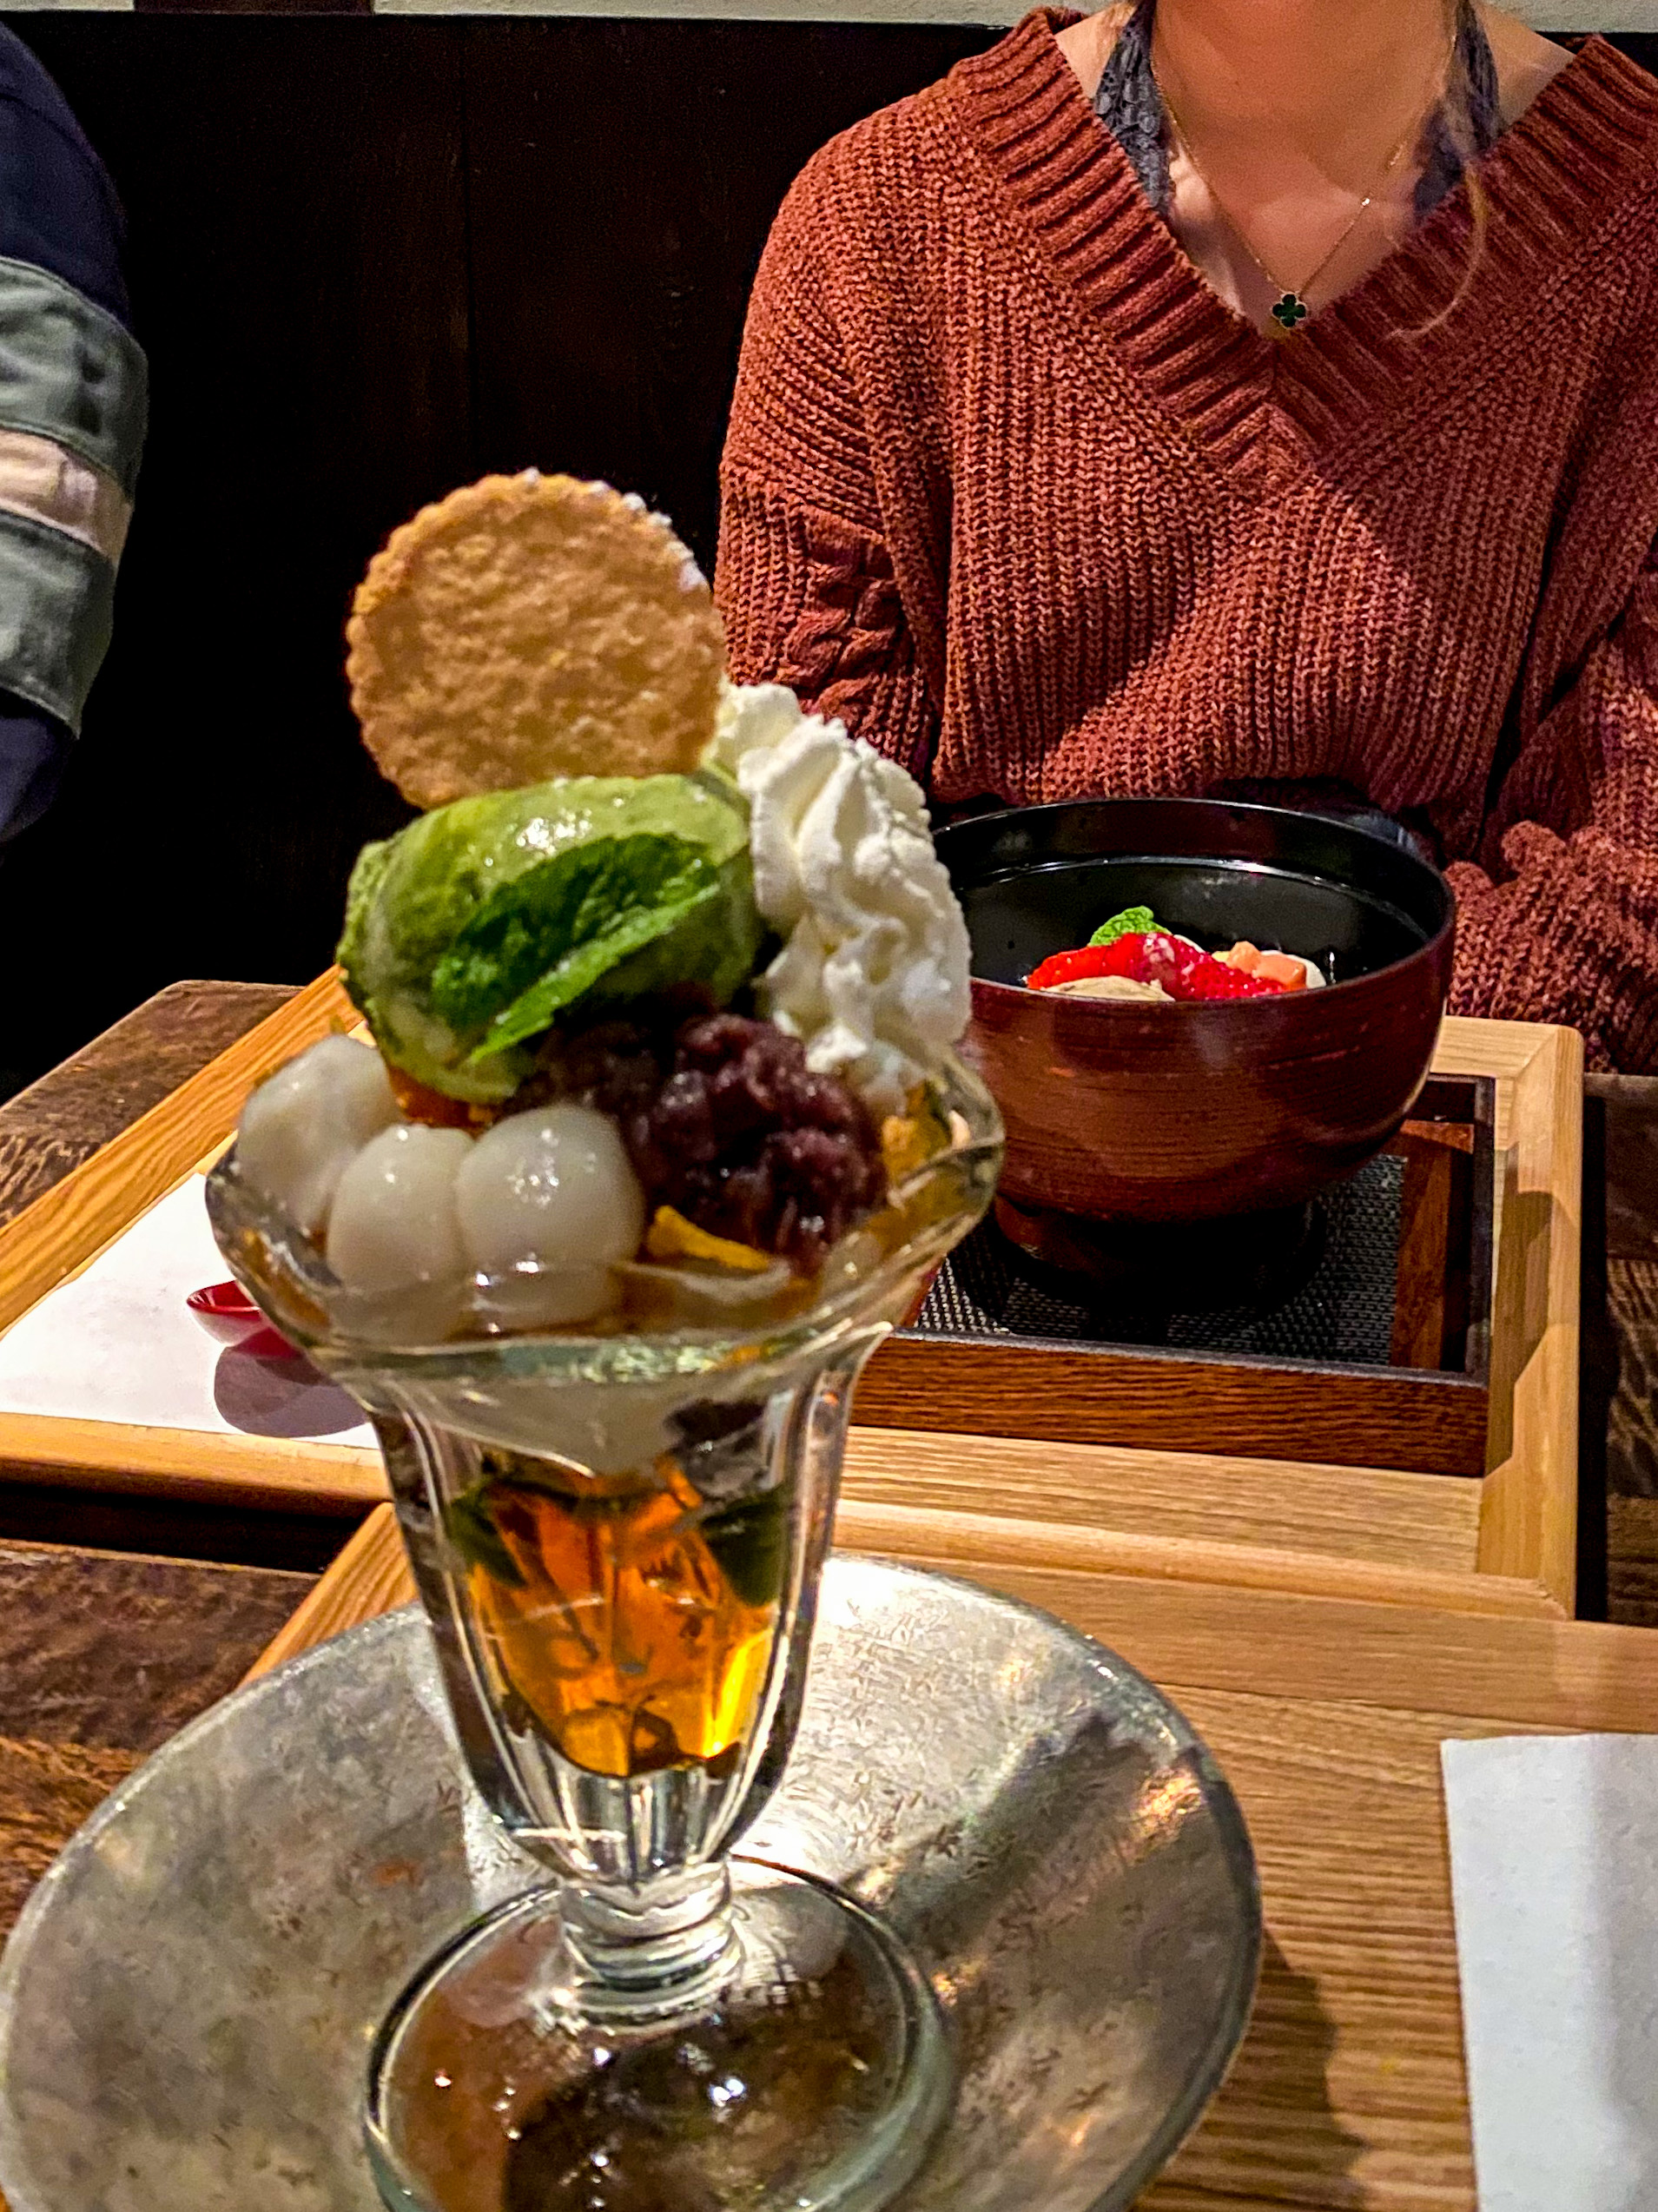

In [30]:
localize_objects('parfait.jpeg')

Number of objects found: 2

Food (confidence: 0.7532868385314941)
Normalized bounding polygon vertices: 
 - (0.5660190582275391, 0.3523135185241699)
 - (0.8760790824890137, 0.3523135185241699)
 - (0.8760790824890137, 0.5718901753425598)
 - (0.5660190582275391, 0.5718901753425598)

Food (confidence: 0.7110308408737183)
Normalized bounding polygon vertices: 
 - (0.11275243014097214, 0.24011100828647614)
 - (0.6098122000694275, 0.24011100828647614)
 - (0.6098122000694275, 0.9507692456245422)
 - (0.11275243014097214, 0.9507692456245422)
